In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
from random import *

train_x = np.array([i+1 for i in range(10)])
print(train_x)
train_y = np.array([i * 2 for i in train_x])
print(train_y)

def standardize(x):
    m = x.mean()  # average
    std = x.std() # standard deviation
    
    return (x - m) / std
train_z = standardize(train_x)
print(train_z)

[ 1  2  3  4  5  6  7  8  9 10]
[ 2  4  6  8 10 12 14 16 18 20]
[-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ]


In [4]:
class Node:
    def __init__(self):
        np.random.seed(0)
        self.w = np.random.randn(1)[0] 
        self.b = np.random.randn(1)[0]
        
    def forpass(self, x):
        # Regression Equation: y = ax + b
        y_hat = x * self.w + self.b 
        return y_hat
    
    def backprop(self, x, err):
        # w(=angle), (y - y^) * x, err = actual_val - predicted_val
        w_grad = err * x 
        b_grad = err     # y 절편, (y - y^)
        return w_grad, b_grad
    
    # epochs: times of learning, x: data, y: actual_value
    def fit(self, x, y, epochs=1): 
        for i in range(epochs):
            for x_i, y_i in zip(x, y): # data & actual_val combination
                y_hat = self.forpass(x_i) 

                # reduce error
                err = -(y_i - y_hat) # err = actual_val - predicted_val
                w_grad, b_grad = self.backprop(x_i, err) 
                
                self.w = self.w - w_grad  # update weight
                self.b = self.b - b_grad  # update constant  
                
                fmt = 'err: {0:.3f}, self.w: {1:.3f}, self.b: {2:.3f}'
                print(fmt.format(err, self.w, self.b))

err: -4.364, self.w: -5.072, self.b: 4.764
err: 6.945, self.w: 3.390, self.b: -2.181
err: -11.131, self.w: -6.299, self.b: 8.951
err: 4.240, self.w: -4.084, self.b: 4.711
err: -4.578, self.w: -4.881, self.b: 9.289
err: -3.561, self.w: -4.262, self.b: 12.850
err: -3.376, self.w: -2.499, self.b: 16.226
err: -1.949, self.w: -0.802, self.b: 18.175
err: -0.803, self.w: 0.176, self.b: 18.977
err: -0.747, self.w: 1.346, self.b: 19.724
prediction:
-1.5666989036012806 -> 17.61508708176769
1.5666989036012806 -> 21.833851525250246


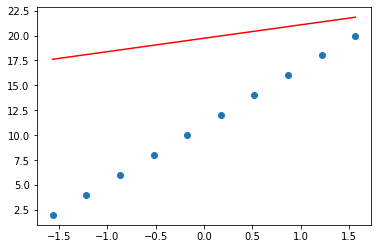

In [9]:
node = Node()
node.fit(train_z, train_y)

# max & min data
startx = np.min(train_z) 
endx = np.max(train_z)    
# use learned model
starty = startx * node.w + node.b 
endy = endx * node.w + node.b     

print('prediction:')
print(startx, '->', starty)
print(endx, '->', endy)

plt.scatter(train_z, train_y)
plt.plot([startx, endx], [starty, endy], color='red') 
plt.show()